In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.autograd import Variable
import copy

/opt/anaconda3/envs/py310/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/envs/py310/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <5AA8DD3D-A2CC-31CA-8060-88B4E9C18B09> /opt/anaconda3/envs/py310/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <4D425044-25DC-3D85-896E-AF4D522793A5> /opt/anaconda3/envs/py310/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
torch.manual_seed(1)

# MNIST dataset
training_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.Compose([

                                                transforms.ToTensor(),

                                                ]),
                                           download=True,
                                          )


testing_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.Compose([

                                                transforms.ToTensor(),

                                                ])
                                         )

print("training_dataset size:", len(training_dataset),"\ntesting_dataset size:", len(testing_dataset))


# Label Randomizer

randomL = torch.tensor(np.random.randint(0, 10, (len(training_dataset)),))
training_dataset.targets = randomL

# Data loader
train_data_loader = torch.utils.data.DataLoader(dataset=training_dataset,
                                           batch_size=90,
                                           shuffle=True)

test_data_loader = torch.utils.data.DataLoader(dataset=testing_dataset,
                                          batch_size=90,
                                          shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



21.9%

100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

training_dataset size: 60000 
testing_dataset size: 10000


In [3]:
class RMNIST(nn.Module):
    def __init__(self):
        super(RMNIST, self).__init__()
        
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 10)
        

    def forward(self, x):

        # flatten as one dimension
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train(model, optimizer, epoch, train_data_loader, interval):
    model.train()
    loss_fn = torch.nn.CrossEntropyLoss()
    correctn = 0
    samplesn = 0
    

    for i, (data, target) in enumerate(train_data_loader):
        
        data, target = Variable(data), Variable(target)
        
        optimizer.zero_grad()
        prediction = model(data) #forward
        loss = loss_fn(prediction, target)
        loss.backward() #backward
        
        optimizer.step()

        _, predicted = torch.max(prediction.data, 1)
        samplesn += target.size(0)
        correctn += (predicted == target).sum().item()
        acc = 100.0 * correctn / samplesn
        
        if i % interval == 0:
            print (f'Train Log:Epoch: {epoch}, Step [{i+1}/{len(train_data_loader.dataset)}], TrainLoss: {loss.item():.4f}')
    return loss.data, round(acc,2)

def test(model, epoch, test_data_loader):
    test_load = test_data_loader
    model.eval()
    correctn = 0
    samplesn = 0
    testLoss = 0
    count = 0
    
    with torch.no_grad():
        for images, labels in test_load:
            images, labels = Variable(images),Variable(labels)
    
            prediction = model(images)
            testLoss += loss_func(prediction,labels).item()
            _,predicted = torch.max(prediction.data, 1)
            samplesn += labels.size(0)
            count += 1
            correctn += (predicted == labels).sum().item()
    
        Test_loss = testLoss/count
        netTest_acc1 = 100.0 * correctn / samplesn
        print(f'Accuracy of the network on the test images: {netTest_acc1}% & Test Loss: {Test_loss}')
    return netTest_acc1, Test_loss

rmnist = RMNIST()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rmnist.parameters(), lr=0.0001)

a=[]
for i in rmnist.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in first model:', np.sum(a),)

train_loss_arr = []

test_loss_arr = []

epochArr = []
epochs = 1000
interval = 500
for epoch in range(1, epochs + 1):
    epochArr.append(epoch)
    loss, acc = train(rmnist, optimizer, epoch, train_data_loader, interval)
    train_loss_arr.append(loss.detach().numpy())
    testAcc,testloss = test(rmnist, epoch, test_data_loader)
    test_loss_arr.append(testloss)

Total no of parameters in first model: 397510
Train Log:Epoch: 1, Step [1/60000], TrainLoss: 2.3063
Train Log:Epoch: 1, Step [501/60000], TrainLoss: 2.3130
Accuracy of the network on the test images: 12.35% & Test Loss: 2.2970151624509265
Train Log:Epoch: 2, Step [1/60000], TrainLoss: 2.3041
Train Log:Epoch: 2, Step [501/60000], TrainLoss: 2.2913
Accuracy of the network on the test images: 16.11% & Test Loss: 2.2863390296697617
Train Log:Epoch: 3, Step [1/60000], TrainLoss: 2.2901
Train Log:Epoch: 3, Step [501/60000], TrainLoss: 2.2982
Accuracy of the network on the test images: 12.56% & Test Loss: 2.2913500389882495
Train Log:Epoch: 4, Step [1/60000], TrainLoss: 2.2999
Train Log:Epoch: 4, Step [501/60000], TrainLoss: 2.3033
Accuracy of the network on the test images: 16.25% & Test Loss: 2.2842295254979814
Train Log:Epoch: 5, Step [1/60000], TrainLoss: 2.2780
Train Log:Epoch: 5, Step [501/60000], TrainLoss: 2.2871
Accuracy of the network on the test images: 14.29% & Test Loss: 2.289142

In [6]:
path="/Users/mithileshbiradar/Desktop"

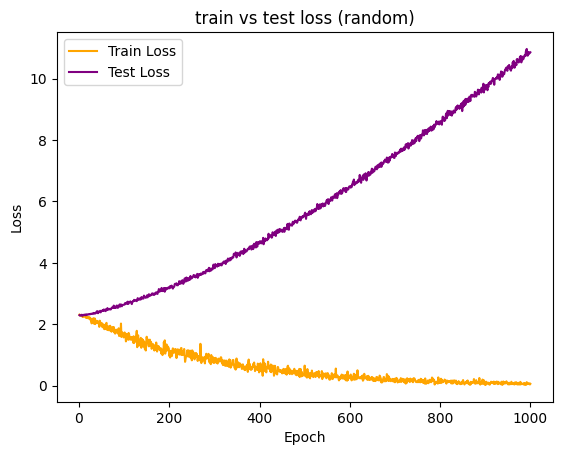

In [8]:
plt.plot(epochArr,train_loss_arr,color="orange")
plt.plot(epochArr,test_loss_arr,color="purple")
plt.legend(['Train Loss','Test Loss'],loc="best")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("train vs test loss (random)",color = "Black")
plt.savefig(path+'mnist3.pdf',
            dpi=400,
            bbox_inches='tight')
plt.show()

In [9]:
# MNIST dataset 
training_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

testing_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

print("training data size:", len(training_dataset),"\ntesting data size:", len(testing_dataset))

training data size: 60000 
testing data size: 10000


In [10]:
# Loading Data
train_data_loader = torch.utils.data.DataLoader(dataset=training_dataset, 
                                           batch_size=500, 
                                           shuffle=True)

test_data_loader = torch.utils.data.DataLoader(dataset=testing_dataset, 
                                          batch_size=100, 
                                          shuffle=False)

In [11]:
class Model_1(nn.Module):
    def __init__(self):
        super(Model_1, self).__init__()
        
        self.fc1 = nn.Linear(784, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
class Model_2(nn.Module):
    def __init__(self,):
        super(Model_2, self).__init__()
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        
class Model_3(nn.Module):
    def __init__(self,):
        super(Model_3, self).__init__()

        self.fc1 = nn.Linear(784, 250)
        self.fc2 = nn.Linear(250, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
class Model_4(nn.Module):
    def __init__(self,):
        super(Model_4, self).__init__()

        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
class Model_5(nn.Module):
    def __init__(self,):
        super(Model_5, self).__init__()
        
        self.fc1 = nn.Linear(784, 550)
        self.fc2 = nn.Linear(550, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
class Model_6(nn.Module):
    def __init__(self,):
        super(Model_6, self).__init__()

        self.fc1 = nn.Linear(784, 750)
        self.fc2 = nn.Linear(750, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
class Model_7(nn.Module):
    def __init__(self,):
        super(Model_7, self).__init__()

        self.fc1 = nn.Linear(784, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        
        
class Model_8(nn.Module):
    def __init__(self,):
        super(Model_8, self).__init__()
        
        self.fc1 = nn.Linear(784, 1050)
        self.fc2 = nn.Linear(1050, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
class Model_9(nn.Module):
    def __init__(self,):
        super(Model_9, self).__init__()

        self.fc1 = nn.Linear(784, 1500)
        self.fc2 = nn.Linear(1500, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
class Model_10(nn.Module):
    def __init__(self,):
        super(Model_10, self).__init__()

        self.fc1 = nn.Linear(784, 2000)
        self.fc2 = nn.Linear(2000, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [12]:
input_size = 784
epoch_maximum = 16
LrRate = 0.0011
kernel_size = 4
epoch_no = 10
dropout = 0.25

In [13]:
#train function
def training_functionn(model,epoch_no):
    model.train()
    totalsteps = len(train_data_loader)
    trainingloss = []
    trainingepoch = []
    trainingacc = []
    not_converged =True
    epoch = 0
    avgtrainingloss = []
    #trainAvgAcc = []
    while not_converged:
        epoch += 1
        correctn = 0
        samplesn = 0
        sumloss = 0
        for i, (images, labels) in enumerate(train_data_loader):  
            prediction = model(images)
            loss = loss_func(prediction, labels)
            sumloss += loss.detach().numpy()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            _used, predicted = torch.max(prediction.data, 1)
            samplesn += labels.size(0)
            correctn += (predicted == labels).sum().item()
            acc = 100.0 * correctn / samplesn
            #accSum += acc

            if (i+1) % 100 == 0:
                print (f'Epoch [{epoch}/{epoch_no}], Step [{i+1}/{totalsteps}], Loss: {loss.item():.4f}, Accuracy : {acc} %', end = '\r', flush=True)
                trainingepoch.append(epoch)
                trainingloss.append(loss.item())
                #print(f'Epoch [{epoch}/{epoch_no}], Accuracy : {acc} %')
                trainingacc.append(acc)


                if epoch == epoch_no:
                        print("Max Epoch Reached")
                        not_converged = False
                elif (epoch > 5) and  (trainingloss[-1] < 0.001):
                    if abs(trainingloss[-3] - trainingloss[-2]) < 1.0e-05 and abs(trainingloss[-2] - trainingloss[-1]) < 1.0e-05:
                        print("Convergeance reached for loss:",trainingloss[-1])
                        not_converged = False
                        
        avgtrainingloss.append(sumloss/totalsteps)
        
        
        print(f'For epoch {epoch} AVG_LOSS: {avgtrainingloss[epoch-1]:.4f}',end = '\r', flush=True)
    return trainingepoch,trainingloss,trainingacc,avgtrainingloss

len(train_data_loader)

120

In [14]:
def testingfunctionn(model): 
    model.eval()
    with torch.no_grad():
        correctn = 0
        samplesn = 0
        testLoss = 0
        count = 0
        for images, labels in test_data_loader:
            prediction = model(images)
            tLoss = loss_func(prediction, labels)
            testLoss += tLoss
            # max returns (value ,index)
            _, predicted = torch.max(prediction.data, 1)
            samplesn += labels.size(0)
            correctn += (predicted == labels).sum().item()
            count += 1

        testLoss /= count
        netTest_acc1 = 100.0 * correctn / samplesn

        print(f'Accuracy of the network:{model._get_name()} on the test images: {netTest_acc1:.2f} % & loss of the network:{testLoss:.4f}')
        return netTest_acc1,testLoss

In [15]:
modelArr = [Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9,Model_10]
traininglosses = {}
trainingaccs = {}
testinglosses = {}
testingaccs = {}
totpara = {}
for i in range (len(modelArr)):
        j = copy.deepcopy(i)
        torch.manual_seed(1)
        j = modelArr[i]()

        loss_func = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(j.parameters(), lr=LrRate) #, weight_decay = weight_decay_val)

        a=[]
        for k in j.parameters():
            a.append(torch.numel(k))
        modelTotalPrams = np.sum(a)
        print(f'Total no of parameters in Model{j._get_name()} :{modelTotalPrams}')

        trainingepoch,trainingloss,trainingacc,avgtrainingloss = training_functionn(j,epoch_no)

        testAcc,testLoss = testingfunctionn(j)

        traininglosses[j._get_name()] = avgtrainingloss
        trainingaccs[j._get_name()] = trainingacc
        testinglosses[j._get_name()] = testLoss
        testingaccs[j._get_name()] = testAcc     
        totpara[j._get_name()] = modelTotalPrams 

Total no of parameters in ModelModel_1 :39760
Max Epoch Reachedep [100/120], Loss: 0.1393, Accuracy : 96.064 %
Accuracy of the network:Model_1 on the test images: 95.53 % & loss of the network:0.1463
Total no of parameters in ModelModel_2 :79510
Max Epoch Reachedep [100/120], Loss: 0.0826, Accuracy : 97.202 %
Accuracy of the network:Model_2 on the test images: 96.67 % & loss of the network:0.1112
Total no of parameters in ModelModel_3 :198760
Max Epoch Reachedep [100/120], Loss: 0.0456, Accuracy : 98.446 %
Accuracy of the network:Model_3 on the test images: 97.61 % & loss of the network:0.0782
Total no of parameters in ModelModel_4 :397510
Max Epoch Reachedep [100/120], Loss: 0.0369, Accuracy : 99.052 %
Accuracy of the network:Model_4 on the test images: 97.78 % & loss of the network:0.0694
Total no of parameters in ModelModel_5 :437260
Max Epoch Reachedep [100/120], Loss: 0.0375, Accuracy : 99.168 %
Accuracy of the network:Model_5 on the test images: 97.91 % & loss of the network:0.06

In [16]:
training_model_loss = [np.min(traininglosses['Model_1']),np.min(traininglosses['Model_2']),
              np.min(traininglosses['Model_3']),np.min(traininglosses['Model_4']),
              np.min(traininglosses['Model_5']),np.min(traininglosses['Model_6']),
              np.min(traininglosses['Model_7']),np.min(traininglosses['Model_8']),
              np.min(traininglosses['Model_9']),np.min(traininglosses['Model_10'])     
            ]
Tmodelpara = [totpara['Model_1'],totpara['Model_2'],totpara['Model_3'],
                totpara['Model_4'],totpara['Model_5'],totpara['Model_6'],
                totpara['Model_7'],totpara['Model_8'],totpara['Model_9'],
                totpara['Model_10']
                ]
testmodelless = [testinglosses['Model_1'],testinglosses['Model_2'],testinglosses['Model_3'],testinglosses['Model_4'],testinglosses['Model_5'],
                  testinglosses['Model_6'],testinglosses['Model_7'],testinglosses['Model_8'],testinglosses['Model_9'],testinglosses['Model_10']     
                ]

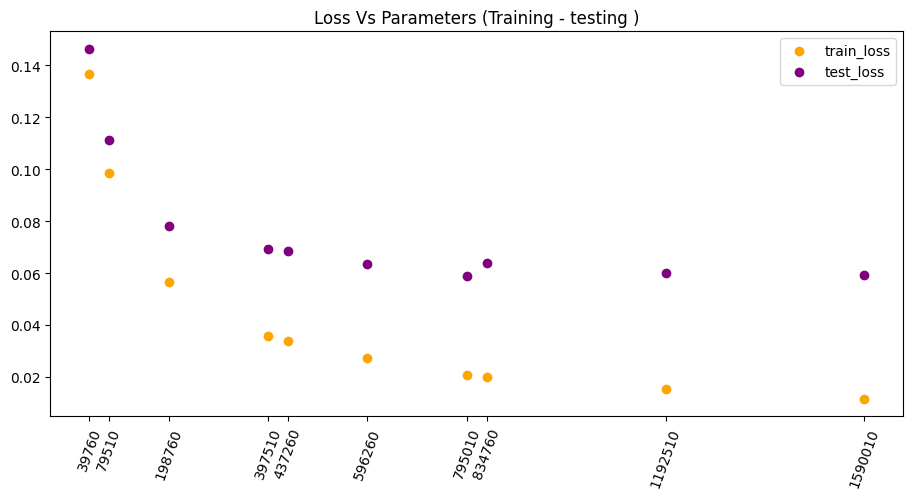

In [18]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(5)
plt.scatter(Tmodelpara,training_model_loss,color="orange")
plt.scatter(Tmodelpara,testmodelless,color="purple")
plt.xticks(Tmodelpara, Tmodelpara,rotation=70)
plt.legend(['train_loss','test_loss'])
plt.title('Loss Vs Parameters (Training - testing )')
plt.savefig(path+'lossvspara.pdf',
            dpi=600,
            bbox_inches='tight')
plt.show()

In [21]:
torch.save(rmnist.state_dict(), 'rmnist.pth')  # Save the model


In [22]:
#plot Acc vs param
trainmodelaccc= [np.max(trainingaccs['Model_1']),np.max(trainingaccs['Model_2']),
              np.max(trainingaccs['Model_3']),np.max(trainingaccs['Model_4']),
              np.max(trainingaccs['Model_5']),np.max(trainingaccs['Model_6']),
              np.max(trainingaccs['Model_7']),np.max(trainingaccs['Model_8']),
              np.max(trainingaccs['Model_9']),np.max(trainingaccs['Model_10'])     
                ]
testmodelaccc = [testingaccs['Model_1'],testingaccs['Model_2'],testingaccs['Model_3'],testingaccs['Model_4'],testingaccs['Model_5'],
                  testingaccs['Model_6'],testingaccs['Model_7'],testingaccs['Model_8'],testingaccs['Model_9'],testingaccs['Model_10']     
                ]

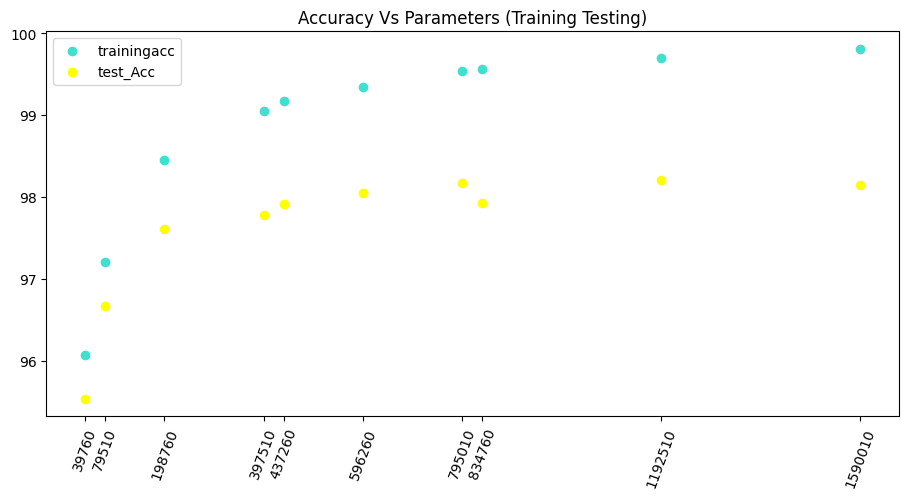

In [25]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(5)
plt.scatter(Tmodelpara,trainmodelaccc,color="turquoise")
plt.scatter(Tmodelpara,testmodelaccc,color="yellow")
plt.xticks(Tmodelpara, Tmodelpara,rotation=70)
plt.legend(['trainingacc','test_Acc'])
plt.title('Accuracy Vs Parameters (Training Testing)')
plt.savefig(path+'accparatt.jpg',
            format='jpeg',
            dpi=800,
            bbox_inches='tight')
plt.show()

In [26]:
class Model_1(nn.Module):
  def __init__(self,):
        super(Model_1, self).__init__()
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 10)
        
  def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [27]:
def train_data_loader(batch_size):
    train_data_loader = torch.utils.data.DataLoader(dataset=training_dataset, 
                                           batch_size = batch_size, 
                                           shuffle=True)
    return train_data_loader


def test_data_loader(batch_size):
    test_data_loader = torch.utils.data.DataLoader(dataset=testing_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
    return test_data_loader

In [28]:
#train function
def training_functionn(model,epoch_no,train_batch_size,status):
    model.train()
    print('strated')
    train_load = train_data_loader(train_batch_size)
    totalsteps = len(train_load)
    trainingloss = []
    trainingepoch = []
    trainingacc = []
    not_converged =True
    epoch = 0
    avgtrainlosses = []
    avgtrainingacc = []

    while not_converged:
        epoch += 1
        correctn = 0
        samplesn = 0
        sumloss =0
        totalacc =0

        for i, (images, labels) in enumerate(train_load):  
            
            images, labels = Variable(images),Variable(labels)
            # zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass
            prediction = model(images)
            loss = loss_func(prediction, labels)
            sumloss += loss.detach().numpy()
            # Backward and optimize
            loss.backward()
            
            optimizer.step()

            _, predicted = torch.max(prediction.data, 1)
            samplesn += labels.size(0)
            correctn += (predicted == labels).sum().item()
            acc = 100.0 * correctn / samplesn
            totalacc += acc

            trainingloss.append(loss.item())
            trainingacc.append(acc)
            trainingepoch.append(epoch)

            if (i+1) % status == 0:
                print (f'Train O/P: Epoch [{epoch}/{epoch_no}], Step [{i+1}/{totalsteps}], Loss: {loss.item():.4f}',end= '\r',flush = True)
   
                if epoch == epoch_no:
                        print("Maximum Epoch Reached")
                        not_converged = False
                elif (epoch > 5) and  (trainingloss[-1] < 0.001):
                    if abs(trainingloss[-3] - trainingloss[-2]) < 1.0e-05 and abs(trainingloss[-2] - trainingloss[-1]) < 1.0e-05:
                        print("Convergeance reached for loss:",trainingloss[-1])
                        not_converged = False

       
        epochaccuracy = totalacc/(i+1)
        avgtrainlosses.append(sumloss/totalsteps)    
        avgtrainingacc.append(epochaccuracy)

    return trainingepoch,trainingloss,trainingacc,avgtrainlosses,avgtrainingacc

In [30]:

torch.manual_seed(1)

LrRate = 0.0016
mBatch1 = Model_1()
loss_func = nn.CrossEntropyLoss()
weight_decay_val = 1e-4

optimizer = torch.optim.Adam(mBatch1.parameters(), lr=LrRate, weight_decay = weight_decay_val)
a=[]
for i in mBatch1.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model with batch_size={65} is:{np.sum(a)}')

Total no of parameters in Model with batch_size=65 is:397510


In [41]:
torch.manual_seed(1)

LrRate = 0.0016
deep1 = Model_1()
loss_func = nn.CrossEntropyLoss()
weight_decay_val = 1e-4

optimizer = torch.optim.Adam(deep1.parameters(), lr=LrRate, weight_decay = weight_decay_val)

a=[]
for i in deep1.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model with batch_size={65} is:{np.sum(a)}')

Total no of parameters in Model with batch_size=65 is:397510


In [42]:
epoch_maximum = 16
train_batch_size = 65
status = 500
deep1_trainepoch,deep1_trainingloss,deep1_trainingaccc,deep1_avgtrainloss,deep1_avgtrainaccc  = training_functionn(deep1,epoch_maximum,train_batch_size,status)

strated
Maximum Epoch Reached16], Step [500/924], Loss: 0.0646


In [43]:
torch.manual_seed(1)

LrRate = 0.0016
deep2 = Model_1()
loss_func = nn.CrossEntropyLoss()
weight_decay_val = 1e-4
optimizer = torch.optim.Adam(deep2.parameters(), lr=LrRate, weight_decay=weight_decay_val) 
a=[]
for i in deep2.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model of batch size = {1000} is: {np.sum(a)}')

Total no of parameters in Model of batch size = 1000 is: 397510


In [44]:
epoch_maximum = 16
train_batch_size = 1000
status = 6
deep2_trainepoch,deep2_trainloss,deep2_trainingacc,deep2_avgtrainloss,deep2_avgtrainaccc = training_functionn(deep2,epoch_maximum,train_batch_size,status)

strated
Maximum Epoch Reached16], Step [6/60], Loss: 0.02472
Maximum Epoch Reached16], Step [12/60], Loss: 0.0273
Maximum Epoch Reached16], Step [18/60], Loss: 0.0265
Maximum Epoch Reached16], Step [24/60], Loss: 0.0350
Maximum Epoch Reached16], Step [30/60], Loss: 0.0287
Maximum Epoch Reached16], Step [36/60], Loss: 0.0266
Maximum Epoch Reached16], Step [42/60], Loss: 0.0270
Maximum Epoch Reached16], Step [48/60], Loss: 0.0312
Maximum Epoch Reached16], Step [54/60], Loss: 0.0275
Maximum Epoch Reached16], Step [60/60], Loss: 0.0277


In [45]:
epochArr = np.array(np.linspace(1,epoch_maximum,epoch_maximum))

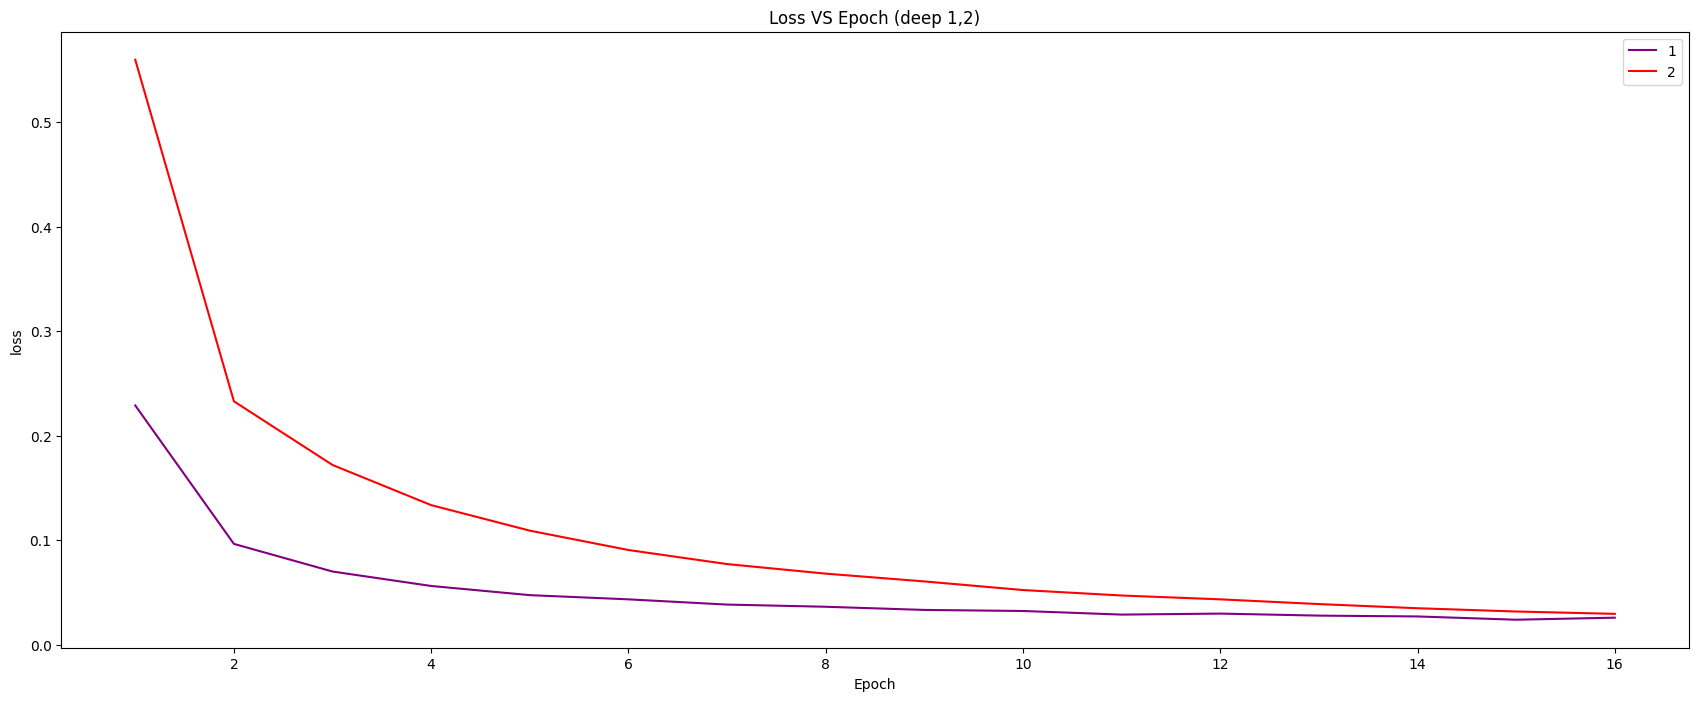

In [47]:
plt.figure(figsize=(21, 8))
plt.plot(epochArr,deep1_avgtrainloss,color="purple")
plt.plot(epochArr,deep2_avgtrainloss,color="red")
plt.title('Loss VS Epoch (deep 1,2)' ,color='black')
plt.legend(['1','2'])
plt.xlabel ('Epoch')
plt.ylabel ('loss')
plt.savefig(path+'deep12',
            format='jpeg',
            dpi=700,
            bbox_inches='tight')
plt.show()

In [48]:
deep1para = torch.nn.utils.parameters_to_vector(deep1.parameters())
print(deep1para,'\nlen:',len(deep1para))

tensor([ 7.0042e-38,  4.3701e-39, -1.4445e-39,  ..., -2.3807e-01,
         4.7415e-01,  9.2505e-02], grad_fn=<CatBackward0>) 
len: 397510


In [49]:
deep2para = torch.nn.utils.parameters_to_vector(deep2.parameters())
print(deep2para,'\nlen:',len(deep2para))

tensor([-2.5808e-24, -2.1763e-24,  8.5209e-25,  ...,  3.7486e-02,
        -2.1428e-02, -2.7661e-02], grad_fn=<CatBackward0>) 
len: 397510


In [52]:
alphaval = np.linspace(-2.0, 2.0, num=31)
print(alphaval)

[-2.         -1.86666667 -1.73333333 -1.6        -1.46666667 -1.33333333
 -1.2        -1.06666667 -0.93333333 -0.8        -0.66666667 -0.53333333
 -0.4        -0.26666667 -0.13333333  0.          0.13333333  0.26666667
  0.4         0.53333333  0.66666667  0.8         0.93333333  1.06666667
  1.2         1.33333333  1.46666667  1.6         1.73333333  1.86666667
  2.        ]


In [53]:
thetanum =[]
for i in range (len(alphaval)):
    theta = (1-alphaval[i])*deep1para + alphaval[i]*deep2para
    thetanum.append(theta)

In [63]:
def testerfunc(model,loss_func,testLoader,test_batch_size): 
    test_data_loader = testLoader
    test_load = test_data_loader(test_batch_size)
    model.eval()
    with torch.no_grad():
        correctn = 0
        samplesn = 0
        testLoss = 0
        count =0
        for images, labels in test_load:
            images, labels = Variable(images),Variable(labels)
            
            prediction = model(images)
            testLoss += loss_func(prediction,labels).item()
            _, predicted = torch.max(prediction.data, 1)
            samplesn += labels.size(0)
            correctn += (predicted == labels).sum().item()
            count +=1

    netTest_loss = testLoss/count
    netTest_acc1 = 100.0 * correctn / samplesn
    print(f'Accuracy of the network on the test images: {netTest_acc1} & Test Loss: {netTest_loss} %', end="\r", flush= True)
    return netTest_acc1, netTest_loss

In [65]:
modtrainepch = []
modelosstrainarrr = []
modeltrianacclis = []
modelsTestLossArr = []
modelsTestAccArr = []

for i in range (len(thetanum)):
    #torch.manual_seed(1)
    
    j=copy.deepcopy(i) 
    theta = (1-alphaval[i])*deep1para + alphaval[i]*deep2para
    j = Model_1()
    torch.nn.utils.vector_to_parameters(theta,j.parameters())
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(j.parameters(), lr=0.0004, weight_decay = 1e-4)
    #optimizer = torch.optim.SGD(j.parameters(), lr=0.001) 

    a=[]
    for k in j.parameters():
        a.append(torch.numel(k))
    print(f'Total no of parameters in Model Theta {i} is:{np.sum(a)}')

    print(j.parameters)

    epoch_maximum = 1
    train_batch_size = 500
    status = 120
    # T_train_acc,T_train_losses = testerfunc(j,loss_func,train_data_loader,train_batch_size)
    T_train_epoch,T_train_losses,T_train_acc,T_trainAvgLossArr,T_trainAvgAccArr = training_functionn(j,epoch_maximum,train_batch_size,status)
    
    
    # modelosstrainarrr.append(T_train_losses)
    # modeltrianacclis.append(T_train_acc)
    modelosstrainarrr.append(T_trainAvgLossArr)
    modeltrianacclis.append(T_trainAvgAccArr)
    
    test_batch_size=500
    T_acc, T_testLoss = testerfunc(j,loss_func,test_data_loader,test_batch_size)
    modelsTestAccArr.append(T_acc)
    modelsTestLossArr.append(T_testLoss)




Total no of parameters in Model Theta 0 is:397510
<bound method Module.parameters of Model_1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>
strated
Maximum Epoch Reached], Step [120/120], Loss: 0.1111
Total no of parameters in Model Theta 1 is:397510& Test Loss: 0.34146792963147166 %
<bound method Module.parameters of Model_1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>
strated
Maximum Epoch Reached], Step [120/120], Loss: 0.1161
Total no of parameters in Model Theta 2 is:397510 & Test Loss: 0.29481760822236536 %
<bound method Module.parameters of Model_1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>
strated
Maximum Epoch Reached], Step [120/120], Loss: 0.0933
Total no of parameters in Model Theta 3 is:397510 & Test Loss: 0.2534186023287475 %
<bou

In [66]:
def meann(dataArr):
    meanModelData = []
    for i in range (len(dataArr)):
        meann = np.mean(dataArr[i])
        meanModelData.append(meann)
    return meanModelData

def minim(dataArr):
    minModelScore = []
    for i in range (len(dataArr)):
        minim = np.mean(dataArr[i])
        minModelScore.append(minim)
    return minModelScore

def maxx(dataArr):
    maxModelScore = []
    for i in range (len(dataArr)):
        maxx = np.max(dataArr[i])
        maxModelScore.append(maxx)
    return maxModelScore

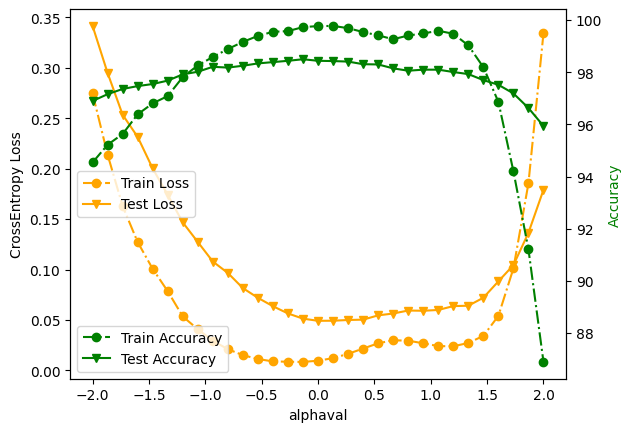

In [69]:
fig,ax=plt.subplots()
ax.plot(alphaval,(modelosstrainarrr),color="orange",linestyle='dashdot', marker="o")
ax.plot(alphaval,modelsTestLossArr,color="orange", marker="v")
ax.legend(['Train Loss','Test Loss'],loc="center left")
ax.set_xlabel("alphaval",color="black")
ax.set_ylabel("CrossEntropy Loss",color = "black")


ax2=ax.twinx()
ax2.plot(alphaval,(modeltrianacclis),color="green",linestyle='dashdot', marker="o")
ax2.plot(alphaval,modelsTestAccArr,color="green", marker="v")
ax2.set_xlabel("alphaval",color="Green")
ax2.set_ylabel("Accuracy",color = "green")
ax2.legend(['Train Accuracy','Test Accuracy'],loc="best")

plt.show()
fig.savefig(path+'alpha',
            format='jpeg',
            dpi=400,
            bbox_inches='tight')

In [70]:
# Training Model with batch size=600 and Lr 1e-3
torch.manual_seed(1)

LrRate = 1e-3
mLr1 = Model_1()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mLr1.parameters(), lr=LrRate) 

a=[]
for i in mLr1.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model with Lr={LrRate} is:{np.sum(a)}')

Total no of parameters in Model with Lr=0.001 is:397510


In [71]:
epoch_maximum = 6
train_batch_size = 65
status = 12
L1_train_epoch,L1_train_losses,L1_train_acc,L1_trainAvgLossArr,L1_trainAvgAccArr  = training_functionn(mLr1,epoch_maximum,train_batch_size,status)

strated
Maximum Epoch Reached], Step [12/924], Loss: 0.03006
Maximum Epoch Reached], Step [24/924], Loss: 0.0099
Maximum Epoch Reached], Step [36/924], Loss: 0.0288
Maximum Epoch Reached], Step [48/924], Loss: 0.0024
Maximum Epoch Reached], Step [60/924], Loss: 0.0260
Maximum Epoch Reached], Step [72/924], Loss: 0.0037
Maximum Epoch Reached], Step [84/924], Loss: 0.0380
Maximum Epoch Reached], Step [96/924], Loss: 0.0080
Maximum Epoch Reached], Step [108/924], Loss: 0.0113
Maximum Epoch Reached], Step [120/924], Loss: 0.0168
Maximum Epoch Reached], Step [132/924], Loss: 0.0092
Maximum Epoch Reached], Step [144/924], Loss: 0.0086
Maximum Epoch Reached], Step [156/924], Loss: 0.0287
Maximum Epoch Reached], Step [168/924], Loss: 0.0267
Maximum Epoch Reached], Step [180/924], Loss: 0.0228
Maximum Epoch Reached], Step [192/924], Loss: 0.0143
Maximum Epoch Reached], Step [204/924], Loss: 0.0536
Maximum Epoch Reached], Step [216/924], Loss: 0.0073
Maximum Epoch Reached], Step [228/924], Loss:

In [72]:
Lr1_param = torch.nn.utils.parameters_to_vector(mLr1.parameters())
print(Lr1_param,'\nlen:',len(Lr1_param))

tensor([ 0.0184, -0.0158, -0.0069,  ..., -0.0131,  0.0478, -0.0187],
       grad_fn=<CatBackward0>) 
len: 397510


In [73]:
torch.manual_seed(1)
LrRate = 1e-2
mLr2 = Model_1()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mLr2.parameters(), lr=LrRate) 

a=[]
for i in mLr2.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model with Lr = {LrRate} is: {np.sum(a)}')

Total no of parameters in Model with Lr = 0.01 is: 397510


In [74]:
epoch_maximum = 6
train_batch_size = 65
status = 12
L2_train_epoch,L2_train_losses,L2_train_acc,L2_trainAvgLossArr,L2_trainAvgAccArr  = training_functionn(mLr2,epoch_maximum,train_batch_size,status)

strated
Maximum Epoch Reached], Step [12/924], Loss: 0.08594
Maximum Epoch Reached], Step [24/924], Loss: 0.0316
Maximum Epoch Reached], Step [36/924], Loss: 0.1176
Maximum Epoch Reached], Step [48/924], Loss: 0.0061
Maximum Epoch Reached], Step [60/924], Loss: 0.0043
Maximum Epoch Reached], Step [72/924], Loss: 0.0420
Maximum Epoch Reached], Step [84/924], Loss: 0.0853
Maximum Epoch Reached], Step [96/924], Loss: 0.1091
Maximum Epoch Reached], Step [108/924], Loss: 0.0420
Maximum Epoch Reached], Step [120/924], Loss: 0.0192
Maximum Epoch Reached], Step [132/924], Loss: 0.0092
Maximum Epoch Reached], Step [144/924], Loss: 0.0036
Maximum Epoch Reached], Step [156/924], Loss: 0.1169
Maximum Epoch Reached], Step [168/924], Loss: 0.0804
Maximum Epoch Reached], Step [180/924], Loss: 0.0044
Maximum Epoch Reached], Step [192/924], Loss: 0.0413
Maximum Epoch Reached], Step [204/924], Loss: 0.0093
Maximum Epoch Reached], Step [216/924], Loss: 0.0155
Maximum Epoch Reached], Step [228/924], Loss:

In [75]:
epochArr = np.array(np.linspace(1,epoch_maximum,epoch_maximum))

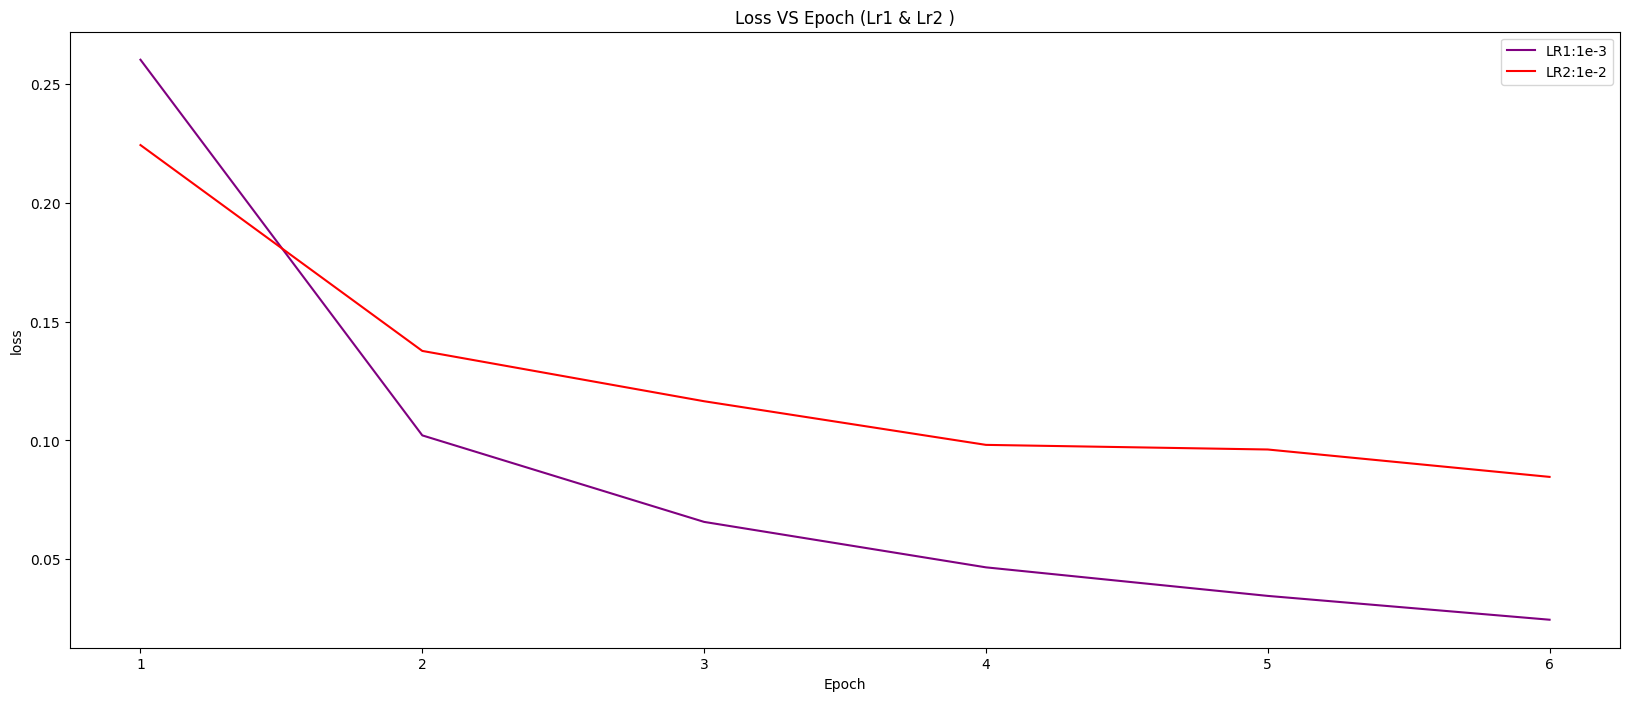

In [77]:
plt.figure(figsize=(20, 8))
plt.plot(epochArr,L1_trainAvgLossArr,color="purple")
plt.plot(epochArr,L2_trainAvgLossArr,color="red")
plt.title('Loss VS Epoch (Lr1 & Lr2 )',color="black")
plt.legend(['LR1:1e-3','LR2:1e-2'])
plt.xlabel ('Epoch')
plt.ylabel ('loss')
plt.savefig(path+'hw3.pdf',
            dpi=100,
            bbox_inches='tight')
plt.show()


In [78]:
Lr2_param = torch.nn.utils.parameters_to_vector(mLr2.parameters())
print(Lr2_param,'\nlen:',len(Lr2_param))

tensor([ 0.0184, -0.0158, -0.0069,  ..., -1.0213,  2.1039,  0.5223],
       grad_fn=<CatBackward0>) 
len: 397510


In [79]:
trainepochmod = []
losspeochmod = []
trainaccmod = []
testlossmod = []
acctestmod = []

for i in range (len(thetanum)):
    torch.manual_seed(1)
    j=copy.deepcopy(i) 
    theta = (1-alphaval[i])*Lr1_param + alphaval[i]*Lr2_param
    j = Model_1()
    torch.nn.utils.vector_to_parameters(theta,j.parameters())
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(j.parameters(), lr=1e-3) #,weight_decay = 0.025)

    a=[]
    for k in j.parameters():
        a.append(torch.numel(k))
    print(f'Total no of parameters in Model Theta {i} is:{np.sum(a)}')

    print(j.parameters)

    epoch_maximum = 1
    train_batch_size = 1000
    status = 60
    T2_train_epoch,T2_train_losses,T2_train_acc,T2_trainAvgLossArr,T2_trainAvgAccArr = training_functionn(j,epoch_maximum,train_batch_size,status) #training_functionn(deep1,epoch_maximum,train_batch_size)
    
    
    #trainepochmod.append(T2_trainAvgLossArr)
    losspeochmod.append(T2_trainAvgLossArr)
    trainaccmod.append(T2_trainAvgAccArr)
    
    test_batch_size=1000
    T2_acc,T2_testLoss = testerfunc(j,loss_func,test_data_loader,test_batch_size)
    acctestmod.append(T2_acc)
    testlossmod.append(T2_testLoss)

Total no of parameters in Model Theta 0 is:397510
<bound method Module.parameters of Model_1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>
strated
Maximum Epoch Reached], Step [60/60], Loss: 114.0575
Total no of parameters in Model Theta 1 is:397510 & Test Loss: 115.52091369628906 %
<bound method Module.parameters of Model_1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>
strated
Maximum Epoch Reached], Step [60/60], Loss: 93.4368
Total no of parameters in Model Theta 2 is:397510 & Test Loss: 94.70529556274414 %
<bound method Module.parameters of Model_1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>
strated
Maximum Epoch Reached], Step [60/60], Loss: 75.7694
Total no of parameters in Model Theta 3 is:397510 & Test Loss: 77.02611351013184 %
<bound me

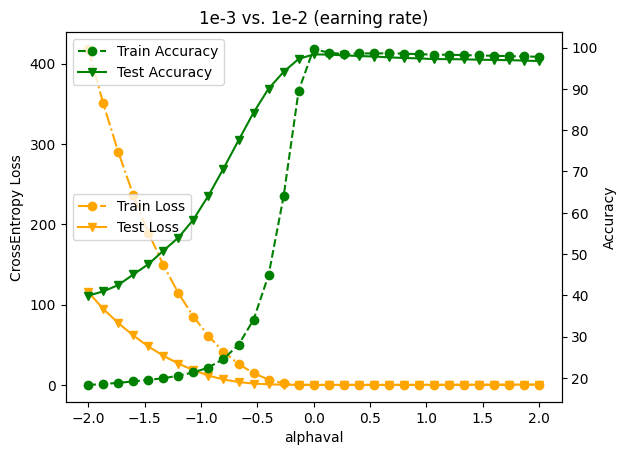

In [93]:
fig,ax=plt.subplots()
ax.plot(alphaval,(losspeochmod),color="orange",linestyle='dashdot', marker="o")
ax.plot(alphaval,testlossmod,color="orange", marker="v")
ax.legend(['Train Loss','Test Loss'],loc="center left")
ax.set_xlabel("alphaval",color="black")
ax.set_ylabel("CrossEntropy Loss",color = "black")
ax.set_title("1e-3 vs. 1e-2 (earning rate)",color = "black")


ax2=ax.twinx()
ax2.plot(alphaval,(trainaccmod),color="green",linestyle='dashed', marker="o")
ax2.plot(alphaval,acctestmod,color="green", marker="v")
ax2.set_xlabel("alphaval",color="black")
ax2.set_ylabel("Accuracy",color = "black")
ax2.legend(['Train Accuracy','Test Accuracy'],loc="best")

plt.show()
fig.savefig(path+'hw33.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [81]:
class Model(nn.Module):
  def __init__(self,):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 10)
        
  def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [94]:
#train function
def training_functionn(model,epoch_no,train_batch_size):
    model.train()
    print('strated')
    train_load = train_data_loader(train_batch_size)
    totalsteps = len(train_load)
    trainingloss = []
    trainingepoch = []
    trainingacc = []
    not_converged =True
    epoch = 0
    sensitivity=[]
    while not_converged:
        epoch += 1
        correctn = 0
        samplesn = 0
        sumloss =0
        for i, (images, labels) in enumerate(train_load):  
            images, labels = Variable(images),Variable(labels)
            
            optimizer.zero_grad()
            
            # Forward pass
            prediction = model(images)

            images.requires_grad = True

            loss = loss_func(prediction, labels)
            sumloss += loss

            loss.backward()
            optimizer.step()
            froGrad=0
            count =0             
        
            for p in model.parameters():
                grad = 0.0
                if p.grad is not None:
                    grad = p.grad
                    froGrad_norm = torch.linalg.norm(grad).numpy()
                    froGrad += froGrad_norm
                    count += 1
            
            sensitivity.append(froGrad/count)
            _, predicted = torch.max(prediction.data, 1)
            samplesn += labels.size(0)
            correctn += (predicted == labels).sum().item()
            acc = 100.0 * correctn / samplesn

            trainingloss.append(loss.item())
            trainingacc.append(acc)
            trainingepoch.append(epoch)
        

            if (i+1) % 10 == 0:
                print (f'Train O/P: Epoch [{epoch}/{epoch_no}], Step [{i+1}/{totalsteps}], Loss: {loss.item():.4f}',end= '\r',flush = True)
                if epoch == epoch_no:
                        print("Max Epoch Reached")
                        not_converged = False
                elif (epoch > 5) and  (trainingloss[-1] < 0.001):
                    if abs(trainingloss[-3] - trainingloss[-2]) < 1.0e-05 and abs(trainingloss[-2] - trainingloss[-1]) < 1.0e-05:
                        print("Convergeance reached for loss:",trainingloss[-1])
                        not_converged = False
                        
        avgtrainingloss = sumloss/i+1
        print("Train Avg loss:",avgtrainingloss)
                        
    return trainingepoch,trainingloss,trainingacc,sensitivity,avgtrainingloss

In [83]:
import copy

In [84]:
batchArr = np.linspace (10,1510,5)
print(batchArr)

[  10.  385.  760. 1135. 1510.]


In [95]:
def testerfunc(model,loss_func,test_batch_size): 
    test_load = test_data_loader(test_batch_size)
    model.eval()
    with torch.no_grad():
        correctn = 0
        samplesn = 0
        testLoss = 0
        count = 0
        for images, labels in test_load:
            images, labels = Variable(images),Variable(labels)
            
            prediction = model(images)
            testLoss += loss_func(prediction,labels).item()
            # max returns (value ,index)
            _, predicted = torch.max(prediction.data, 1)
            samplesn += labels.size(0)
            correctn += (predicted == labels).sum().item()
            count += 1
    netTest_loss = testLoss/count
    netTest_acc1 = 100.0 * correctn / samplesn
    print(f'Accuracy on test images: {netTest_acc1}% & Test Loss: {netTest_loss} ',end= '\r',flush = True)
    return netTest_acc1, netTest_loss

In [98]:
modtrainepch = []
modelosstrainarrr = []
modeltrianacclis = []
modelsTestLossArr = []
modelsTestAccArr = []
modelsSensitivityArr = []

temModel = Model ()

a=[]
for k in temModel.parameters():
    a.append(torch.numel(k))

print(f'Total no of parameters in Model :{np.sum(a)}')

for i in range (len(batchArr)):
    torch.manual_seed(1)
    
    j=copy.deepcopy(i) 
    j = Model()
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(j.parameters(), lr=1e-3, weight_decay= 1e-4)


    epoch_maximum = 5
    train_batch_size = int(batchArr[i])

    trainingepoch,trainingloss,trainingacc,sensitivity,tvgLoss = training_functionn(j,epoch_maximum,train_batch_size)

    test_batch_size = int(batchArr[i])

    testAcc, testLoss = testerfunc(j,loss_func,test_batch_size)

    
    modtrainepch.append(trainingepoch)
    modelosstrainarrr.append(trainingloss)
    modeltrianacclis.append(trainingacc)
    modelsTestAccArr.append(testAcc)
    modelsTestLossArr.append(testLoss)
    modelsSensitivityArr.append(sensitivity)

Total no of parameters in Model :397510
strated
Train Avg loss: tensor(1.1957, grad_fn=<AddBackward0>)
Train Avg loss: tensor(1.0903, grad_fn=<AddBackward0>)
Train Avg loss: tensor(1.0715, grad_fn=<AddBackward0>)
Train Avg loss: tensor(1.0619, grad_fn=<AddBackward0>)
Max Epoch Reached[5/5], Step [10/6000], Loss: 0.0639
Max Epoch Reached[5/5], Step [20/6000], Loss: 0.0048
Max Epoch Reached[5/5], Step [30/6000], Loss: 0.0059
Max Epoch Reached[5/5], Step [40/6000], Loss: 0.0008
Max Epoch Reached[5/5], Step [50/6000], Loss: 0.0077
Max Epoch Reached[5/5], Step [60/6000], Loss: 0.0079
Max Epoch Reached[5/5], Step [70/6000], Loss: 0.0264
Max Epoch Reached[5/5], Step [80/6000], Loss: 0.0117
Max Epoch Reached[5/5], Step [90/6000], Loss: 0.0285
Max Epoch Reached[5/5], Step [100/6000], Loss: 0.3268
Max Epoch Reached[5/5], Step [110/6000], Loss: 0.0095
Max Epoch Reached[5/5], Step [120/6000], Loss: 0.0279
Max Epoch Reached[5/5], Step [130/6000], Loss: 0.1534
Max Epoch Reached[5/5], Step [140/6000]

In [89]:
modelepochtrain = []
modelosstrainarrr = []
modeltrianacclis = []
modelsTestLossArr = []
modelsTestAccArr = []
modelsSensitivityArr = []

temModel = Model ()

a=[]
for k in temModel.parameters():
    a.append(torch.numel(k))

print(f'Total no of parameters in Model :{np.sum(a)}')

for i in range (len(batchArr)):
    torch.manual_seed(1)
    
    j=copy.deepcopy(i) 
    j = Model()
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(j.parameters(), lr=1e-3, weight_decay= 1e-4)


    epoch_maximum = 5
    train_batch_size = int(batchArr[i])

    trainingepoch,trainingloss,trainingacc,sensitivity,tvgLoss = training_functionn(j,epoch_maximum,train_batch_size)

    test_batch_size = int(batchArr[i])

    testAcc, testLoss = testerfunc(j,loss_func,test_batch_size)

    
    modelepochtrain.append(trainingepoch)
    modelosstrainarrr.append(trainingloss)
    modeltrianacclis.append(trainingacc)
    modelsTestAccArr.append(testAcc)
    modelsTestLossArr.append(testLoss)
    modelsSensitivityArr.append(sensitivity)

Total no of parameters in Model :397510
strated
Train Avg loss: tensor(1.1957, grad_fn=<AddBackward0>)
Train Avg loss: tensor(1.0903, grad_fn=<AddBackward0>)
Train Avg loss: tensor(1.0715, grad_fn=<AddBackward0>)
Train Avg loss: tensor(1.0619, grad_fn=<AddBackward0>)
Max Epoch Reached[5/5], Step [10/6000], Loss: 0.0639
Max Epoch Reached[5/5], Step [20/6000], Loss: 0.0048
Max Epoch Reached[5/5], Step [30/6000], Loss: 0.0059
Max Epoch Reached[5/5], Step [40/6000], Loss: 0.0008
Max Epoch Reached[5/5], Step [50/6000], Loss: 0.0077
Max Epoch Reached[5/5], Step [60/6000], Loss: 0.0079
Max Epoch Reached[5/5], Step [70/6000], Loss: 0.0264
Max Epoch Reached[5/5], Step [80/6000], Loss: 0.0117
Max Epoch Reached[5/5], Step [90/6000], Loss: 0.0285
Max Epoch Reached[5/5], Step [100/6000], Loss: 0.3268
Max Epoch Reached[5/5], Step [110/6000], Loss: 0.0095
Max Epoch Reached[5/5], Step [120/6000], Loss: 0.0279
Max Epoch Reached[5/5], Step [130/6000], Loss: 0.1534
Max Epoch Reached[5/5], Step [140/6000]

In [99]:
def meann(dataArr):
    meanModelData = []
    for i in range (len(dataArr)):
        meann = np.mean(dataArr[i])
        meanModelData.append(meann)
    return meanModelData

def minim(dataArr):
    minModelScore = []
    for i in range (len(dataArr)):
        minim = np.mean(dataArr[i])
        minModelScore.append(minim)
    return minModelScore

def maxx(dataArr):
    maxModelScore = []
    for i in range (len(dataArr)):
        maxx = np.max(dataArr[i])
        maxModelScore.append(maxx)
    return maxModelScore


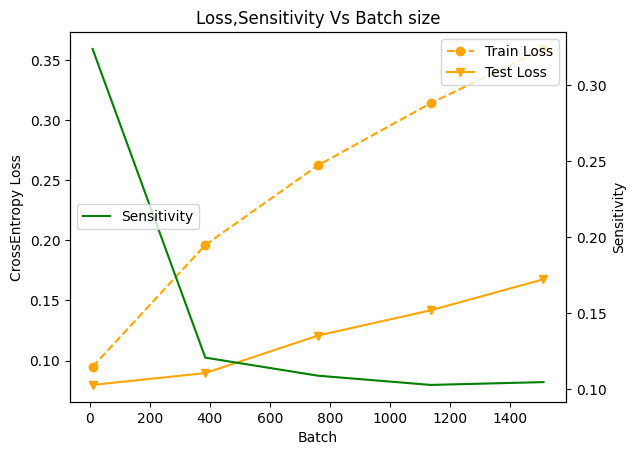

In [102]:
fig,ax=plt.subplots()
ax.plot(batchArr,minim(modelosstrainarrr),color="orange", marker="o",linestyle='dashed')
ax.plot(batchArr,modelsTestLossArr,color="orange", marker="v")
ax.legend(['Train Loss','Test Loss'],loc="upper right")
ax.set_xlabel("Batch",color="black")
ax.set_ylabel("CrossEntropy Loss",color = "black")
ax.set_title("Loss,Sensitivity Vs Batch size",color="black")

ax2=ax.twinx()
ax2.plot(batchArr,minim(modelsSensitivityArr),color="green")
ax2.set_xlabel("Batch",color="black")
ax2.set_ylabel("Sensitivity",color = "black")
ax2.legend(['Sensitivity'],loc="center left")

plt.show()
fig.savefig(path+'.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

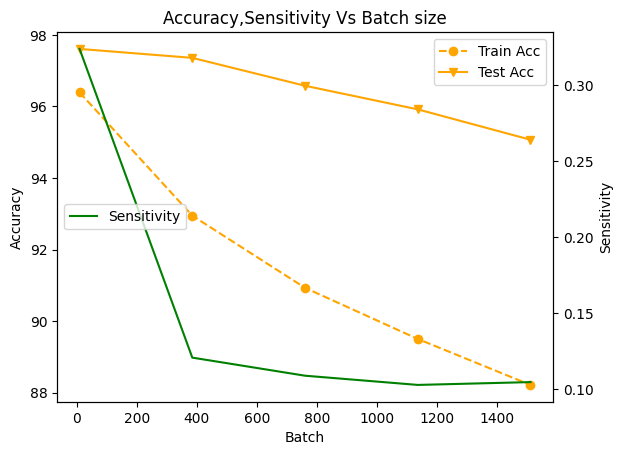

In [101]:
fig,ax=plt.subplots()
ax.plot(batchArr,minim(modeltrianacclis),color="orange", marker="o",linestyle='dashed')
ax.plot(batchArr,modelsTestAccArr,color="orange", marker="v")
ax.legend(['Train Acc','Test Acc'],loc="upper right")
ax.set_xlabel("Batch",color="black")
#ax.set_xscale('log')
ax.set_ylabel("Accuracy",color = "black")
ax.set_title("Accuracy,Sensitivity Vs Batch size",color="black")

ax2=ax.twinx()
ax2.plot(batchArr,minim(modelsSensitivityArr),color="green")
ax2.set_xlabel("Batch",color="black")
ax2.set_ylabel("Sensitivity",color = "black")
ax2.legend(['Sensitivity'],loc="center left")

plt.show()
fig.savefig(path+'part2fig2.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')